In [ ]:
%pip install numpy matplotlib tabulate

## Cari persamaan pangkat sederhana terhadap data berikut
$$
y = ae^{bx}
$$

| X  | 2   | 3   | 4   | 5   | 6   |
|-----|-----|-----|-----|-----|-----|
| Y | 2.50 | 3.80 | 5.70 | 8.40 | 12.30 |

$$
a_1 = \frac{n \sum (x_i y_i) - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$$


In [3]:
import numpy as np
n = 5
x = np.array([1,2,3,4,5])
y = np.array([2.50,3.80,5.70,8.40,12.30])

In [4]:
x_squared = x * x # xi^2
ln_y = np.round(np.log(y), 2) # yi
x_ln_y = x * ln_y # xi*yi

xi_total = np.round(np.sum(x),2)
yi_total = np.round(np.sum(ln_y),2)
xi_squared_total = np.round(np.sum(x_squared),2)
x_ln_y_total = np.round(np.sum(x_ln_y),2)

xr = xi_total / n
yr = np.round((yi_total / n),2)

a1 = (n * x_ln_y_total - xi_total * yi_total) / (n * xi_squared_total - xi_total ** 2)
a0 = np.round((yr - a1 * xr),2) 
a = np.round(np.exp(a0),2)
b = np.round(a1,2)


In [5]:
from tabulate import tabulate

table_data = [
    [i+1,x[i], ln_y[i], x_squared[i], x_ln_y[i]]
    for i in range(n)
]

table_data.append(["total", xi_total, yi_total, xi_squared_total, x_ln_y_total])
headers = ["No", "xi = x", "yi = ln(y)", "xi^2", "xi*yi"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+-------+----------+--------------+--------+---------+
| No    |   xi = x |   yi = ln(y) |   xi^2 |   xi*yi |
+=======+==========+==============+========+=========+
| 1     |        1 |         0.92 |      1 |    0.92 |
+-------+----------+--------------+--------+---------+
| 2     |        2 |         1.34 |      4 |    2.68 |
+-------+----------+--------------+--------+---------+
| 3     |        3 |         1.74 |      9 |    5.22 |
+-------+----------+--------------+--------+---------+
| 4     |        4 |         2.13 |     16 |    8.52 |
+-------+----------+--------------+--------+---------+
| 5     |        5 |         2.51 |     25 |   12.55 |
+-------+----------+--------------+--------+---------+
| total |       15 |         8.64 |     55 |   29.89 |
+-------+----------+--------------+--------+---------+


In [6]:
# Hasil
print(f'rata-rata y = {xi_total} / {n} = {xr}')
print(f'rata-rata x = {yi_total} / {n} = {yr}')
print(f'Total (xi * yi) = {x_ln_y_total}')
print(f'Total (xi^2) = {xi_squared_total}')
print(f'a1 = [n * Σ(xi * yi) - Σxi * Σyi] / [n * Σxi^2 - (Σxi)^2] = [{n} * {x_ln_y_total} - {xi_total} * {yi_total}] / [{n} * {xi_squared_total} - ({xi_total})^2] = {np.round(a1,2)}')
print(f'a0 = yr-a1*xr = {yr} - {np.round(a1,1)} * {xr} = {a0}')
print(f'a= exp(a0) = {a}')
print(f'b = a1 = {b}')
print("Persamaan Regresi Linier :")
print("y =", a, "e^(", b, "x)")


rata-rata y = 15 / 5 = 3.0
rata-rata x = 8.64 / 5 = 1.73
Total (xi * yi) = 29.89
Total (xi^2) = 55
a1 = [n * Σ(xi * yi) - Σxi * Σyi] / [n * Σxi^2 - (Σxi)^2] = [5 * 29.89 - 15 * 8.64] / [5 * 55 - (15)^2] = 0.4
a0 = yr-a1*xr = 1.73 - 0.4 * 3.0 = 0.54
a= exp(a0) = 1.72
b = a1 = 0.4
Persamaan Regresi Linier :
y = 1.72 e^( 0.4 x)


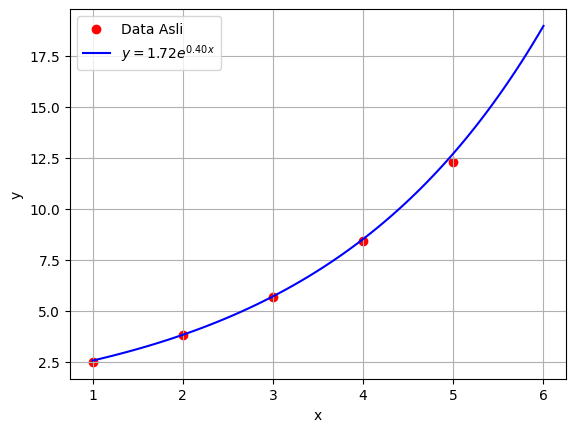

In [8]:
import matplotlib.pyplot as plt

# Buat nilai x untuk kurva regresi
x_curve = np.linspace(min(x), 6, 100)
y_curve = a * np.exp(b * x_curve)

# Plot data asli
plt.scatter(x, y, color='red', label="Data Asli")

# Plot kurva regresi eksponensial
plt.plot(x_curve, y_curve, color='blue', label=r"$y = {:.2f} e^{{{:.2f}x}}$".format(a, b))

# Label dan judul
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()
